Problem Statement:-
    
    The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database:-
    
The database includes the following indicators:
•	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    
•	`country_long` (text): longer form of the country designation
    
•	`name` (text): name or title of the power plant, generally in Romanized form
    
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
    
•	`capacity_mw` (number): electrical generating capacity in megawatts
    
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
•	`primary_fuel` (text): energy source used in primary electricity generation or export
    
•	`other_fuel1` (text): energy source used in electricity generation or export
    
•	`other_fuel2` (text): energy source used in electricity generation or export
    
•	`other_fuel3` (text): energy source used in electricity generation or export
    
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
    
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
    
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    
•	`url` (text): web document corresponding to the `source` field
    
•	`geolocation_source` (text): attribution for geolocation information
    
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    
•	`year_of_capacity_data` (number): year the capacity information was reported
    
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
    
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
    
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
    
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
    
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
    
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
    
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    
•	`generation_data_source` (text): attribution for the reported generation information
    
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
    
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
    
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
    
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
    
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
    
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
    
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
    
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
    
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


# Aim of the project - Predicting primary fuel and Capacity_mw for Global power pant dataset

In [1]:
# Improting required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



# Loading Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
df.shape

(907, 27)

# Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

From the data we can observe that there is 907 rows and 27 columns

out of that  are 15 float data type 12 and object data type

There is some missing values in dataset

for exact count we need to check the null values in dataset

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

with the above there are many null values in dataset

Latitude and logitude have 46 null values

Other_fuel1,Other_fuel2,Other_fuel3 have lot of null values

some of the improtant columns have more than 500 null values we need to treat them accordingly

We can drop the columns which are irrelavent like Country,country_long



In [9]:
df.drop(['country','country_long'],inplace=True,axis=1)

wepp_id,generation_data_souce,estimated_generation_gwh also not relavent.Having so many Nan values,instead of filling we 

will drop other_fuel1,other_fuel2,other_fuel3  have many Nan values, we will drop them also

In [10]:
df.drop(['other_fuel1','other_fuel2','other_fuel3','geolocation_source','wepp_id','url','generation_data_source','estimated_generation_gwh','source'],inplace=True,axis=1)

In [11]:
df.drop(['year_of_capacity_data'],inplace=True,axis=1)

# Filling Null values

In [12]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

In [13]:

df['generation_gwh_2014'].fillna(value=df['generation_gwh_2014'].median(),inplace =True)
df['generation_gwh_2015'].fillna(value=df['generation_gwh_2015'].median(),inplace =True)
df['generation_gwh_2016'].fillna(value=df['generation_gwh_2016'].median(),inplace =True)
df['generation_gwh_2017'].fillna(value=df['generation_gwh_2017'].median(),inplace =True)
df['generation_gwh_2018'].fillna(value=df['generation_gwh_2018'].median(),inplace =True)

In [14]:
df['latitude'].fillna(value=df['latitude'].mean(),inplace =True)
df['longitude'].fillna(value=df['longitude'].mean(),inplace =True)

In [15]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2013    907
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
generation_gwh_2019    907
dtype: int64

In [16]:
df.drop(['generation_gwh_2013'],inplace=True,axis=1)
df.drop(['generation_gwh_2019'],inplace=True,axis=1)

In [17]:
# Hence 'generation_gwh_2013','generation_gwh_2019 ' columns droping they are completely null values and they will not show any impact on ML model

In [18]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

# Exploratory data analysis

Univarient Analysis

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

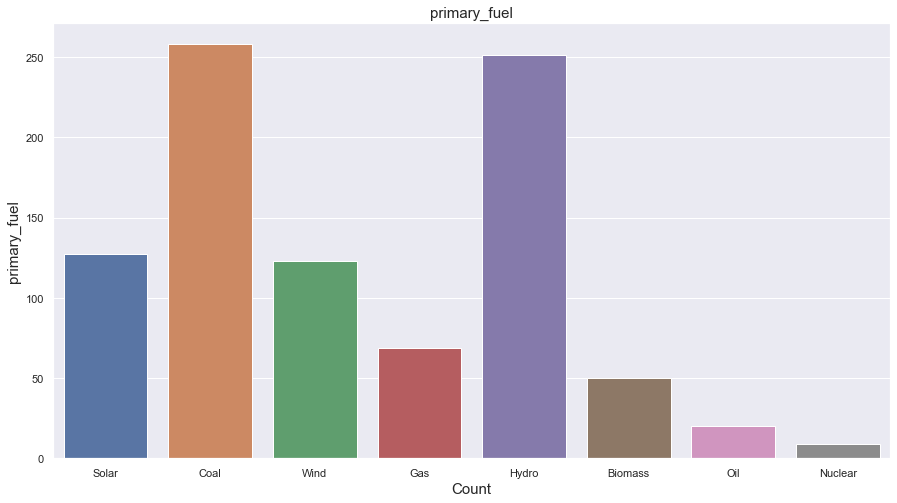

In [19]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))
sns.countplot(df['primary_fuel'])
plt.xlabel('Count',fontsize=15)
plt.ylabel('primary_fuel',fontsize=15)
plt.title('primary_fuel',fontsize=15)

df['primary_fuel'].value_counts()

With above plot we can understand that most of the power plants usings Coal,Hydro as primary fuel solar wind and gas are also considerable range

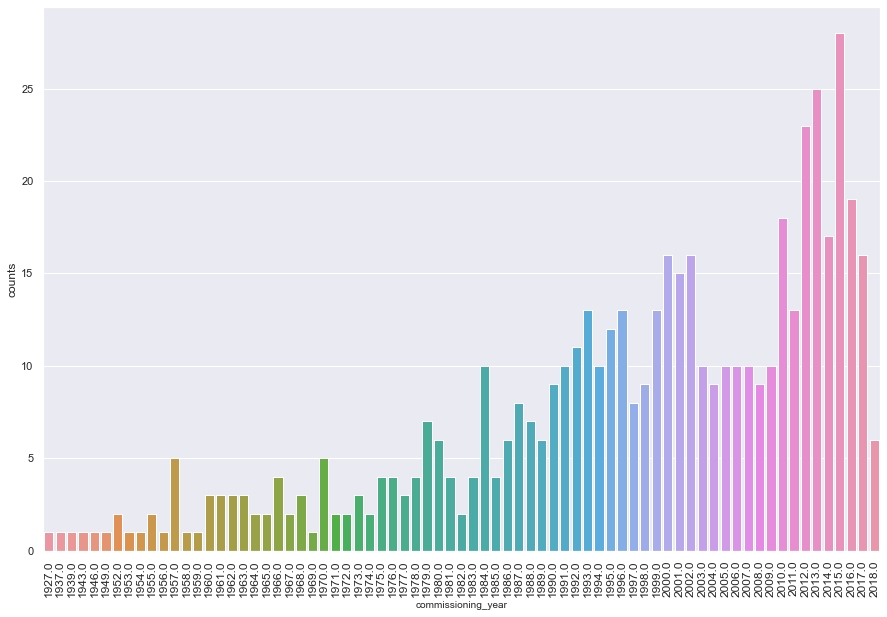

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(df['commissioning_year'])
plt.xlabel('commissioning_year',fontsize=10)
plt.ylabel('counts',fontsize=12)
locs,labels=plt.xticks(fontsize=12)
plt.setp(labels,rotation=90)
plt.show()

With the above plot we can understand that india starts power plants building in 1927 and the count is very low up to 1956

from 1957 to 1980 there is considerable growth 

In the year 1964 the total count increased to 10 after that there is continues growth in power sector

In the year 2015 the growth is very high after that the growth slightly decreased

In [21]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

With the above we can understand that ACC,Sterling,JK cement has high no ie.4 power plant and swppl and jaypee has 3 power plant

and other has 1 power plant 

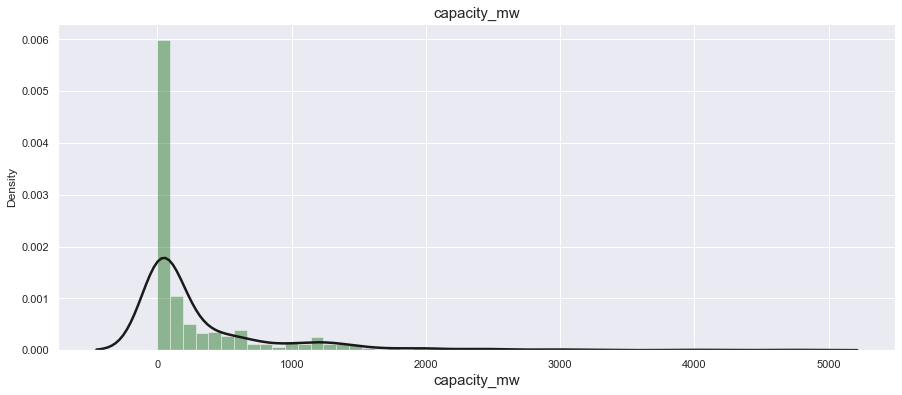

In [22]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,6))

sns.distplot(df['capacity_mw'],color='darkgreen',kde_kws={"color":'k','lw':2.5,'label':'KDE'})
plt.title('capacity_mw',fontsize=15)
plt.xlabel('capacity_mw',fontsize=15)
plt.show()

With the above plot we can understand that capacity greater than 1000 is less

Data is normally distributed and have outliers

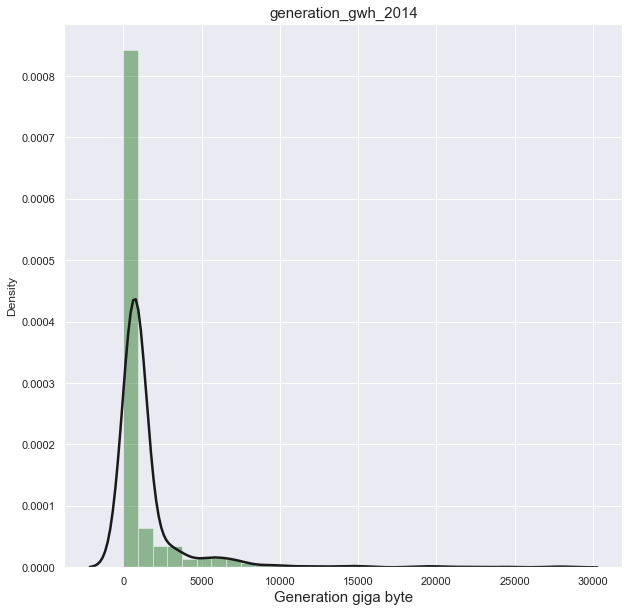

In [23]:
plt.figure(figsize=(10,10))

sns.distplot(df['generation_gwh_2014'],color='darkgreen',kde_kws={'color':'k','lw':2.5,'label':'KDE'})
plt.title('generation_gwh_2014',fontsize=15)
plt.xlabel('Generation giga byte',fontsize=15)
plt.show()

With the above plot we can understand data distributed not normally and having skewness

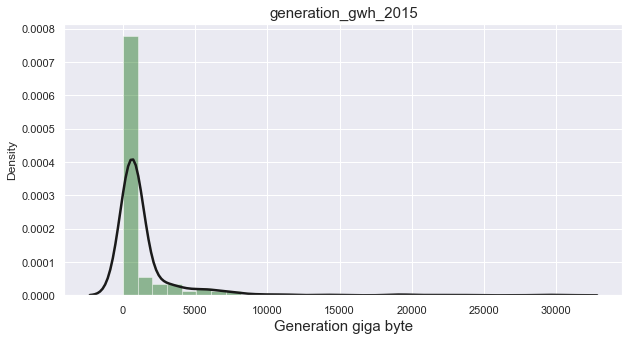

In [24]:
plt.figure(figsize=(10,5))

sns.distplot(df['generation_gwh_2015'],color='darkgreen',kde_kws={'color':'k','lw':'2.5','label':'KDE'})
plt.title('generation_gwh_2015',fontsize=15)
plt.xlabel('Generation giga byte',fontsize=15)
plt.show()

With the above plot we can understand data distributed not normally and having skewness

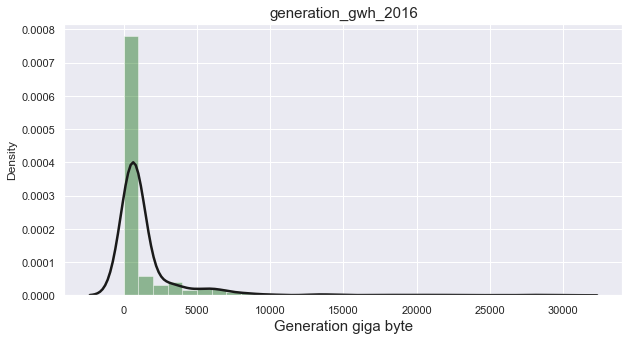

In [25]:
plt.figure(figsize=(10,5))

sns.distplot(df['generation_gwh_2016'],color='darkgreen',kde_kws={'color':'k','lw':'2.5','label':'KDE'})
plt.title('generation_gwh_2016',fontsize=15)
plt.xlabel('Generation giga byte',fontsize=15)
plt.show()

With the above plot we can understand data distributed not normally and having skewness

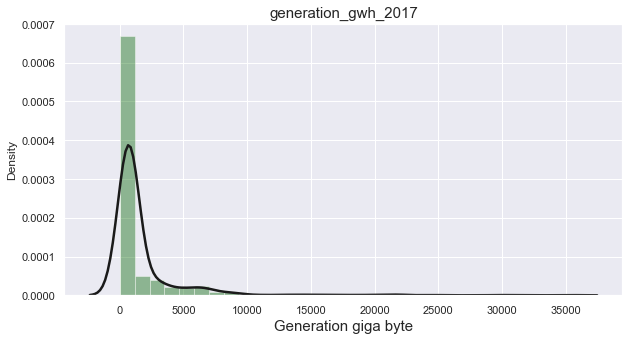

In [26]:
plt.figure(figsize=(10,5))

sns.distplot(df['generation_gwh_2017'],color='darkgreen',kde_kws={'color':'k','lw':'2.5','label':'KDE'})
plt.title('generation_gwh_2017',fontsize=15)
plt.xlabel('Generation giga byte',fontsize=15)
plt.show()

With the above plot we can understand data distributed not normally and having skewness

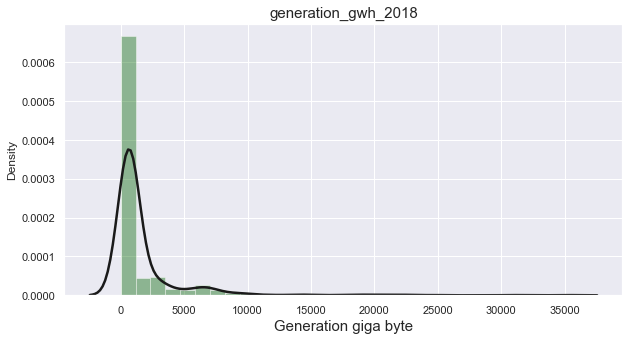

In [27]:
plt.figure(figsize=(10,5))

sns.distplot(df['generation_gwh_2018'],color='darkgreen',kde_kws={'color':'k','lw':'2.5','label':'KDE'})
plt.title('generation_gwh_2018',fontsize=15)
plt.xlabel('Generation giga byte',fontsize=15)
plt.show()

With the above plot we can understand data distributed not normally and having skewness

# Bi-varient analysis

In this analysis we will analyse the feature columns against target columns

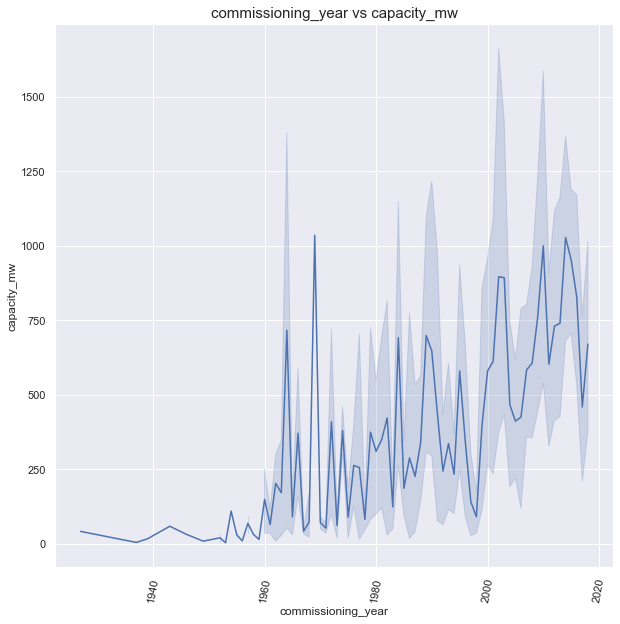

In [28]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,x='commissioning_year',y='capacity_mw')
locs,labels=plt.xticks()
plt.title('commissioning_year vs capacity_mw',fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

With the above plot we can under stand that years increasind plants development and capacity alsow increasing

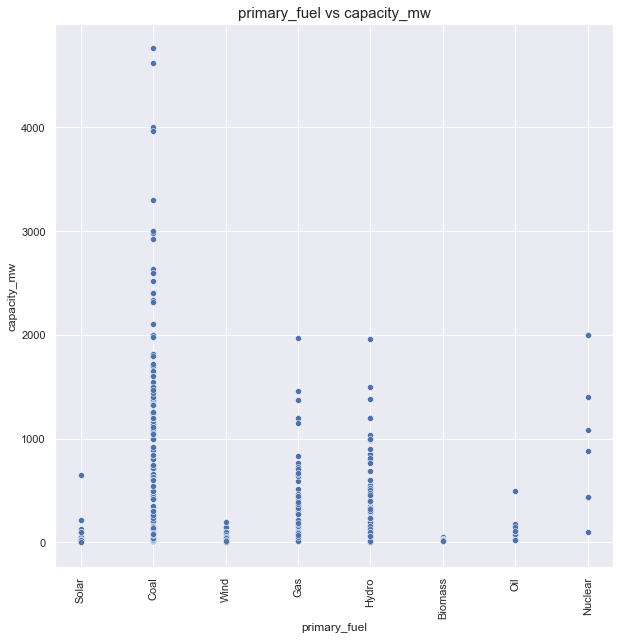

In [29]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='primary_fuel',y='capacity_mw')
locs,labels = plt.xticks()
plt.title('primary_fuel vs capacity_mw',fontsize=15)
plt.setp(labels,rotation=90)
plt.show()

With the above plot we can understand that most of the power production with coal only

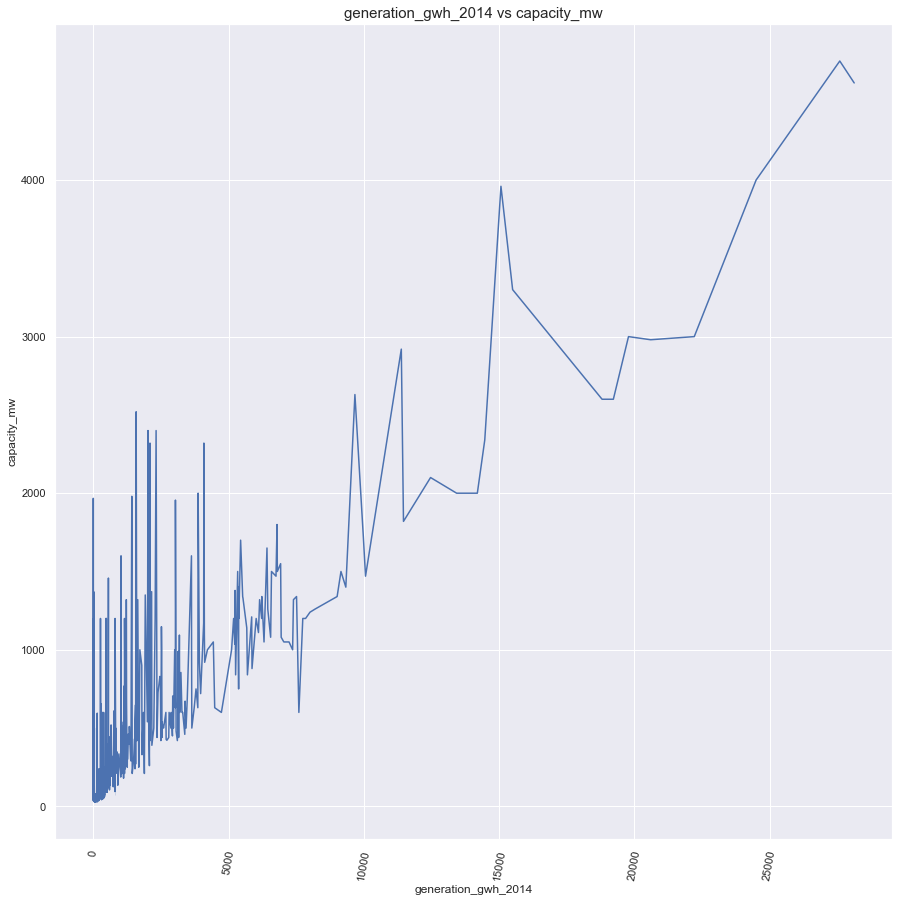

In [30]:
plt.figure(figsize=(15,15))
sns.lineplot(data = df,x='generation_gwh_2014',y='capacity_mw')
locs,labels=plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw',fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

With higher capacity,generation_gwh_2014 also increasing

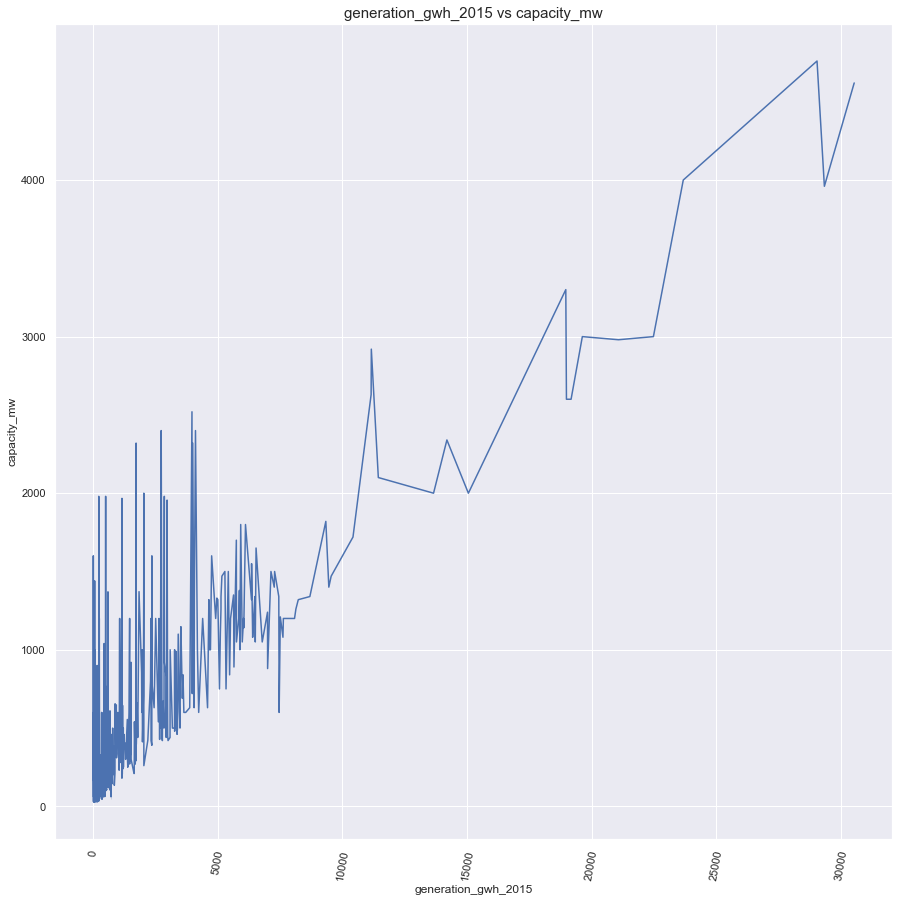

In [31]:
plt.figure(figsize=(15,15))
sns.lineplot(data = df,x='generation_gwh_2015',y='capacity_mw')
locs,labels=plt.xticks()
plt.title('generation_gwh_2015 vs capacity_mw',fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

With higher capacity,generation_gwh_2015 also increasing

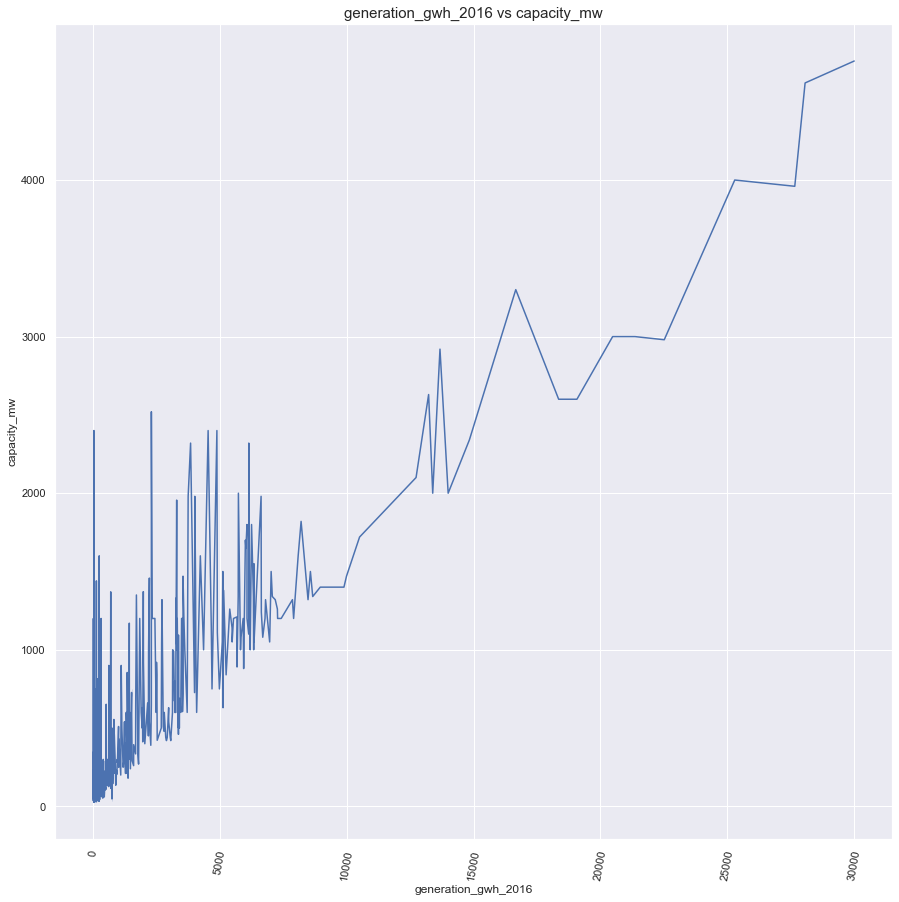

In [32]:
plt.figure(figsize=(15,15))
sns.lineplot(data = df,x='generation_gwh_2016',y='capacity_mw')
locs,labels=plt.xticks()
plt.title('generation_gwh_2016 vs capacity_mw',fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

With higher capacity,generation_gwh_2016 also increasing

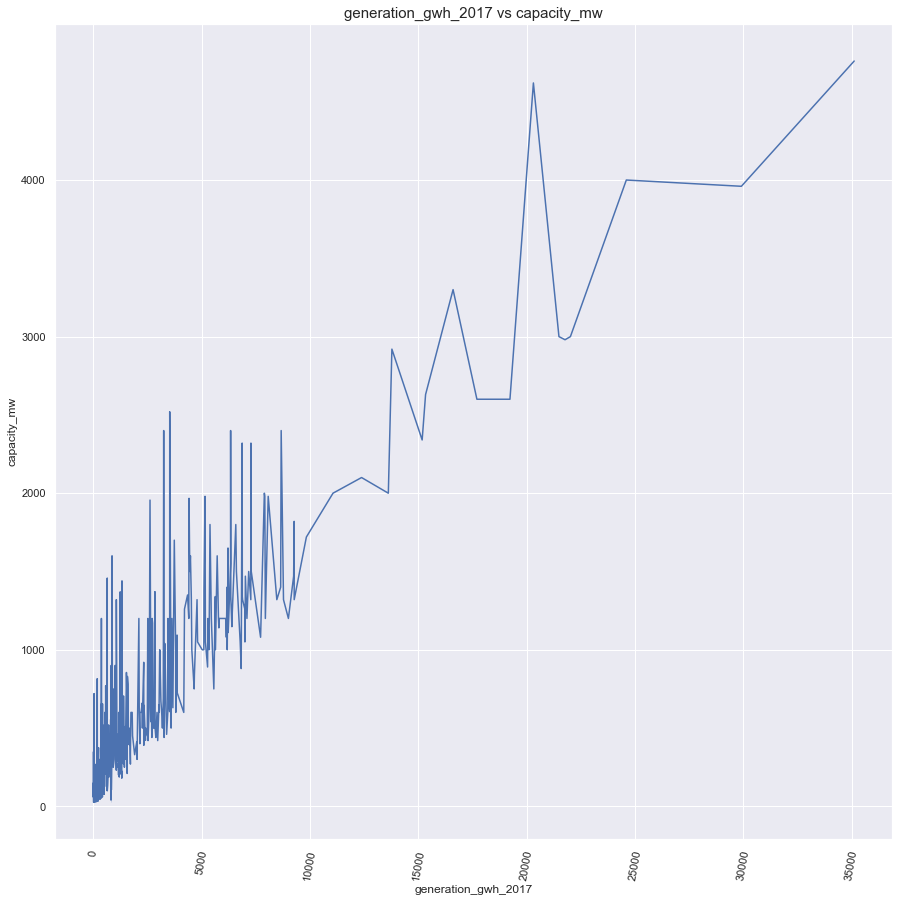

In [33]:
plt.figure(figsize=(15,15))
sns.lineplot(data = df,x='generation_gwh_2017',y='capacity_mw')
locs,labels=plt.xticks()
plt.title('generation_gwh_2017 vs capacity_mw',fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

With higher capacity,generation_gwh_2017 also increasing

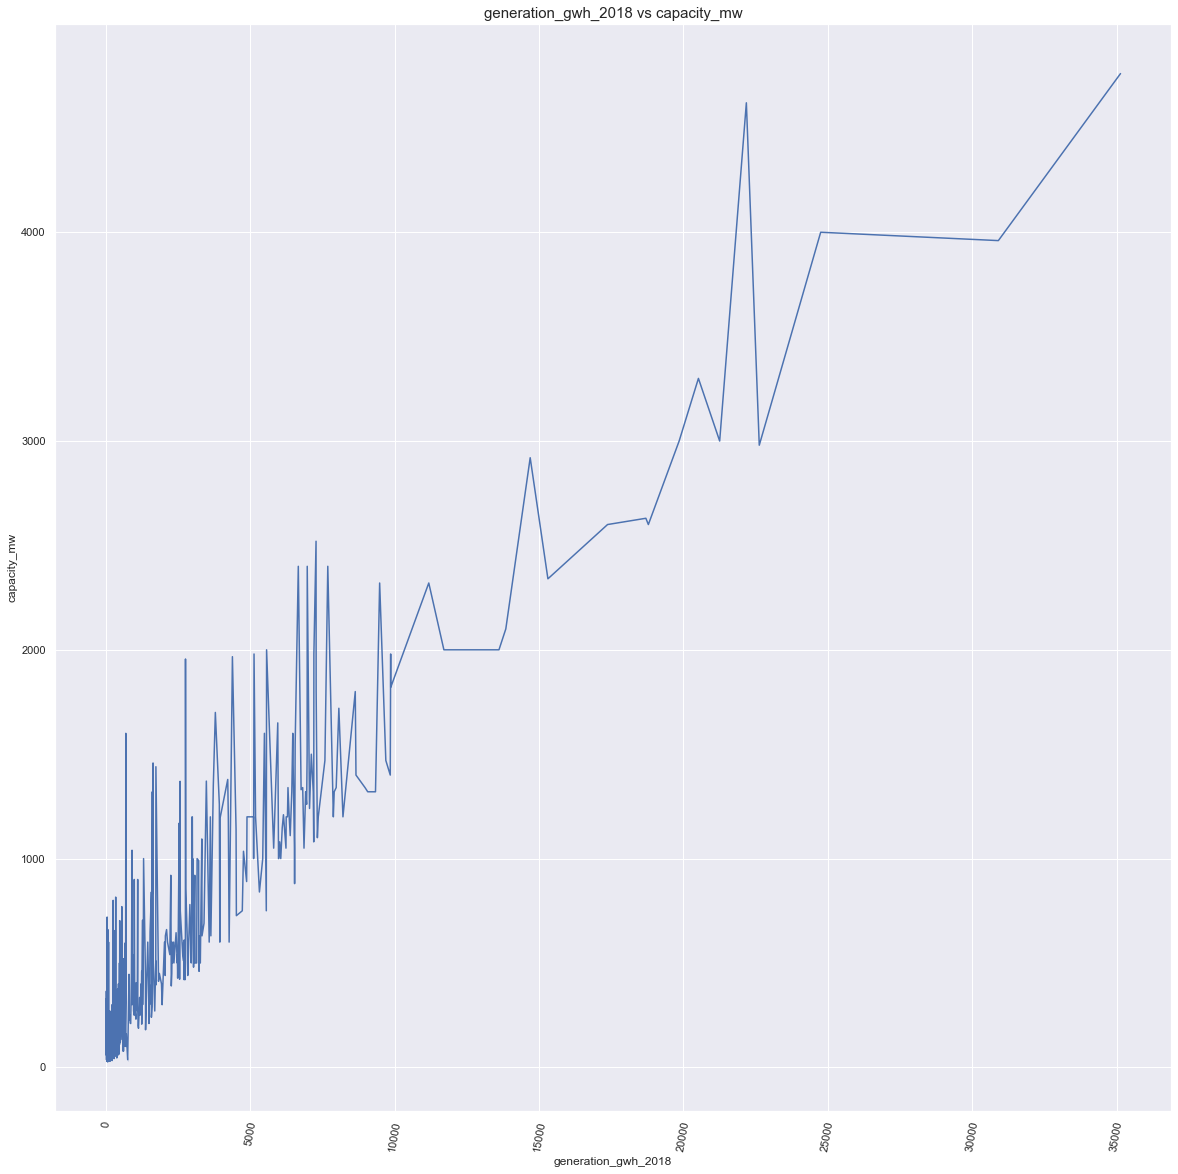

In [34]:
plt.figure(figsize=(20,20))
sns.lineplot(data = df,x='generation_gwh_2018',y='capacity_mw')
locs,labels=plt.xticks()
plt.title('generation_gwh_2018 vs capacity_mw',fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

With higher capacity,generation_gwh_2018 also increasing

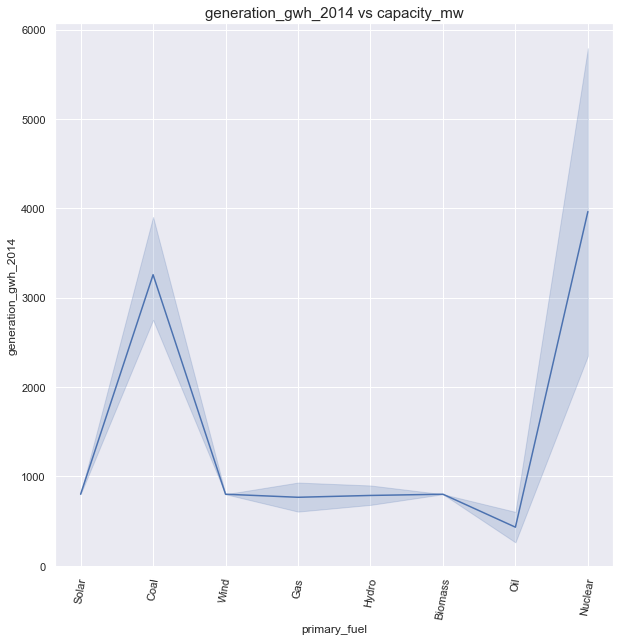

In [35]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,x='primary_fuel',y='generation_gwh_2014')
locs,labels = plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw',fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

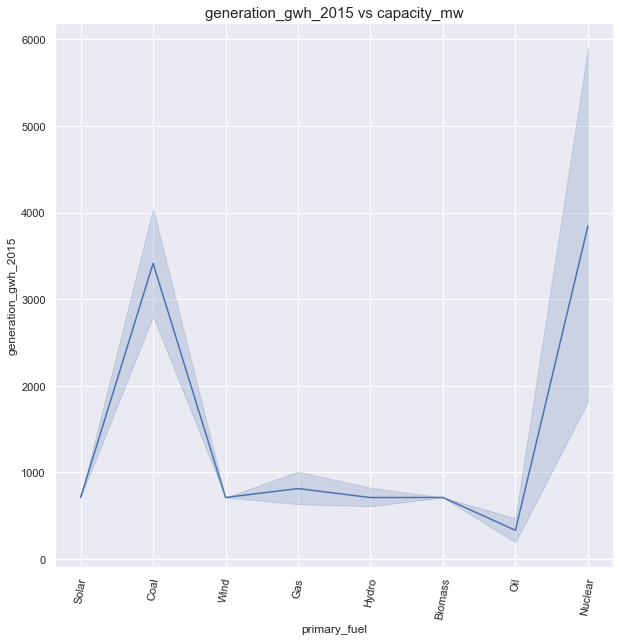

In [36]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,x='primary_fuel',y='generation_gwh_2015')
locs,labels = plt.xticks()
plt.title('generation_gwh_2015 vs capacity_mw',fontsize = 15)
plt.setp(labels,rotation=80)
plt.show()

With the above plots we can see that mostly coal is used for power generation

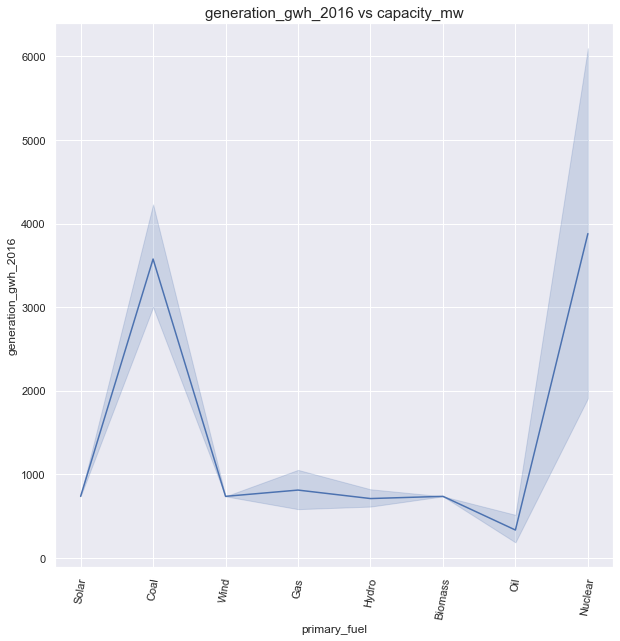

In [37]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,x='primary_fuel',y='generation_gwh_2016')
locs,labels = plt.xticks()
plt.title('generation_gwh_2016 vs capacity_mw',fontsize = 15)
plt.setp(labels,rotation=80)
plt.show()

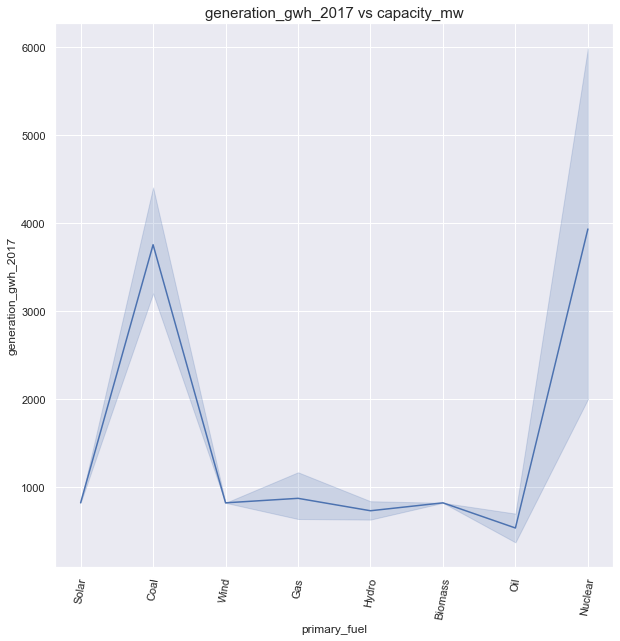

In [38]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,x='primary_fuel',y='generation_gwh_2017')
locs,labels = plt.xticks()
plt.title('generation_gwh_2017 vs capacity_mw',fontsize = 15)
plt.setp(labels,rotation=80)
plt.show()

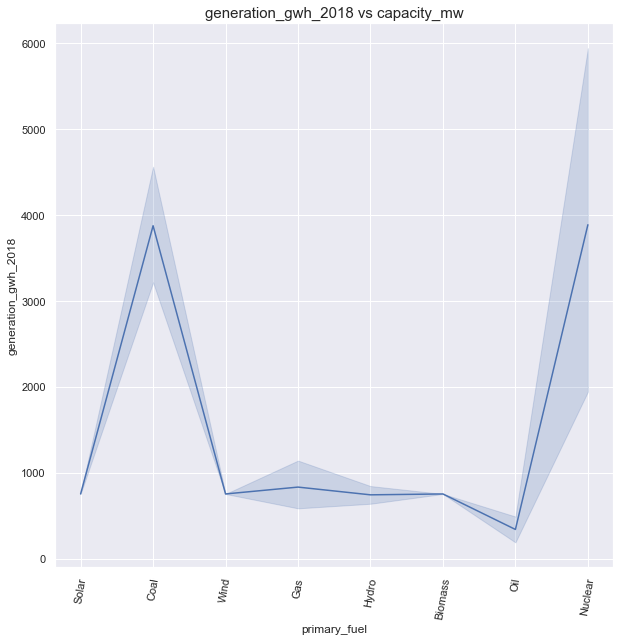

In [39]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,x='primary_fuel',y='generation_gwh_2018')
locs,labels = plt.xticks()
plt.title('generation_gwh_2018 vs capacity_mw',fontsize = 15)
plt.setp(labels,rotation=80)
plt.show()

In [40]:
df.head(2)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,801.123775,711.181225,737.20545,817.97725,751.644375
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,801.123775,711.181225,737.20545,817.97725,751.644375


# Multivarient analysis

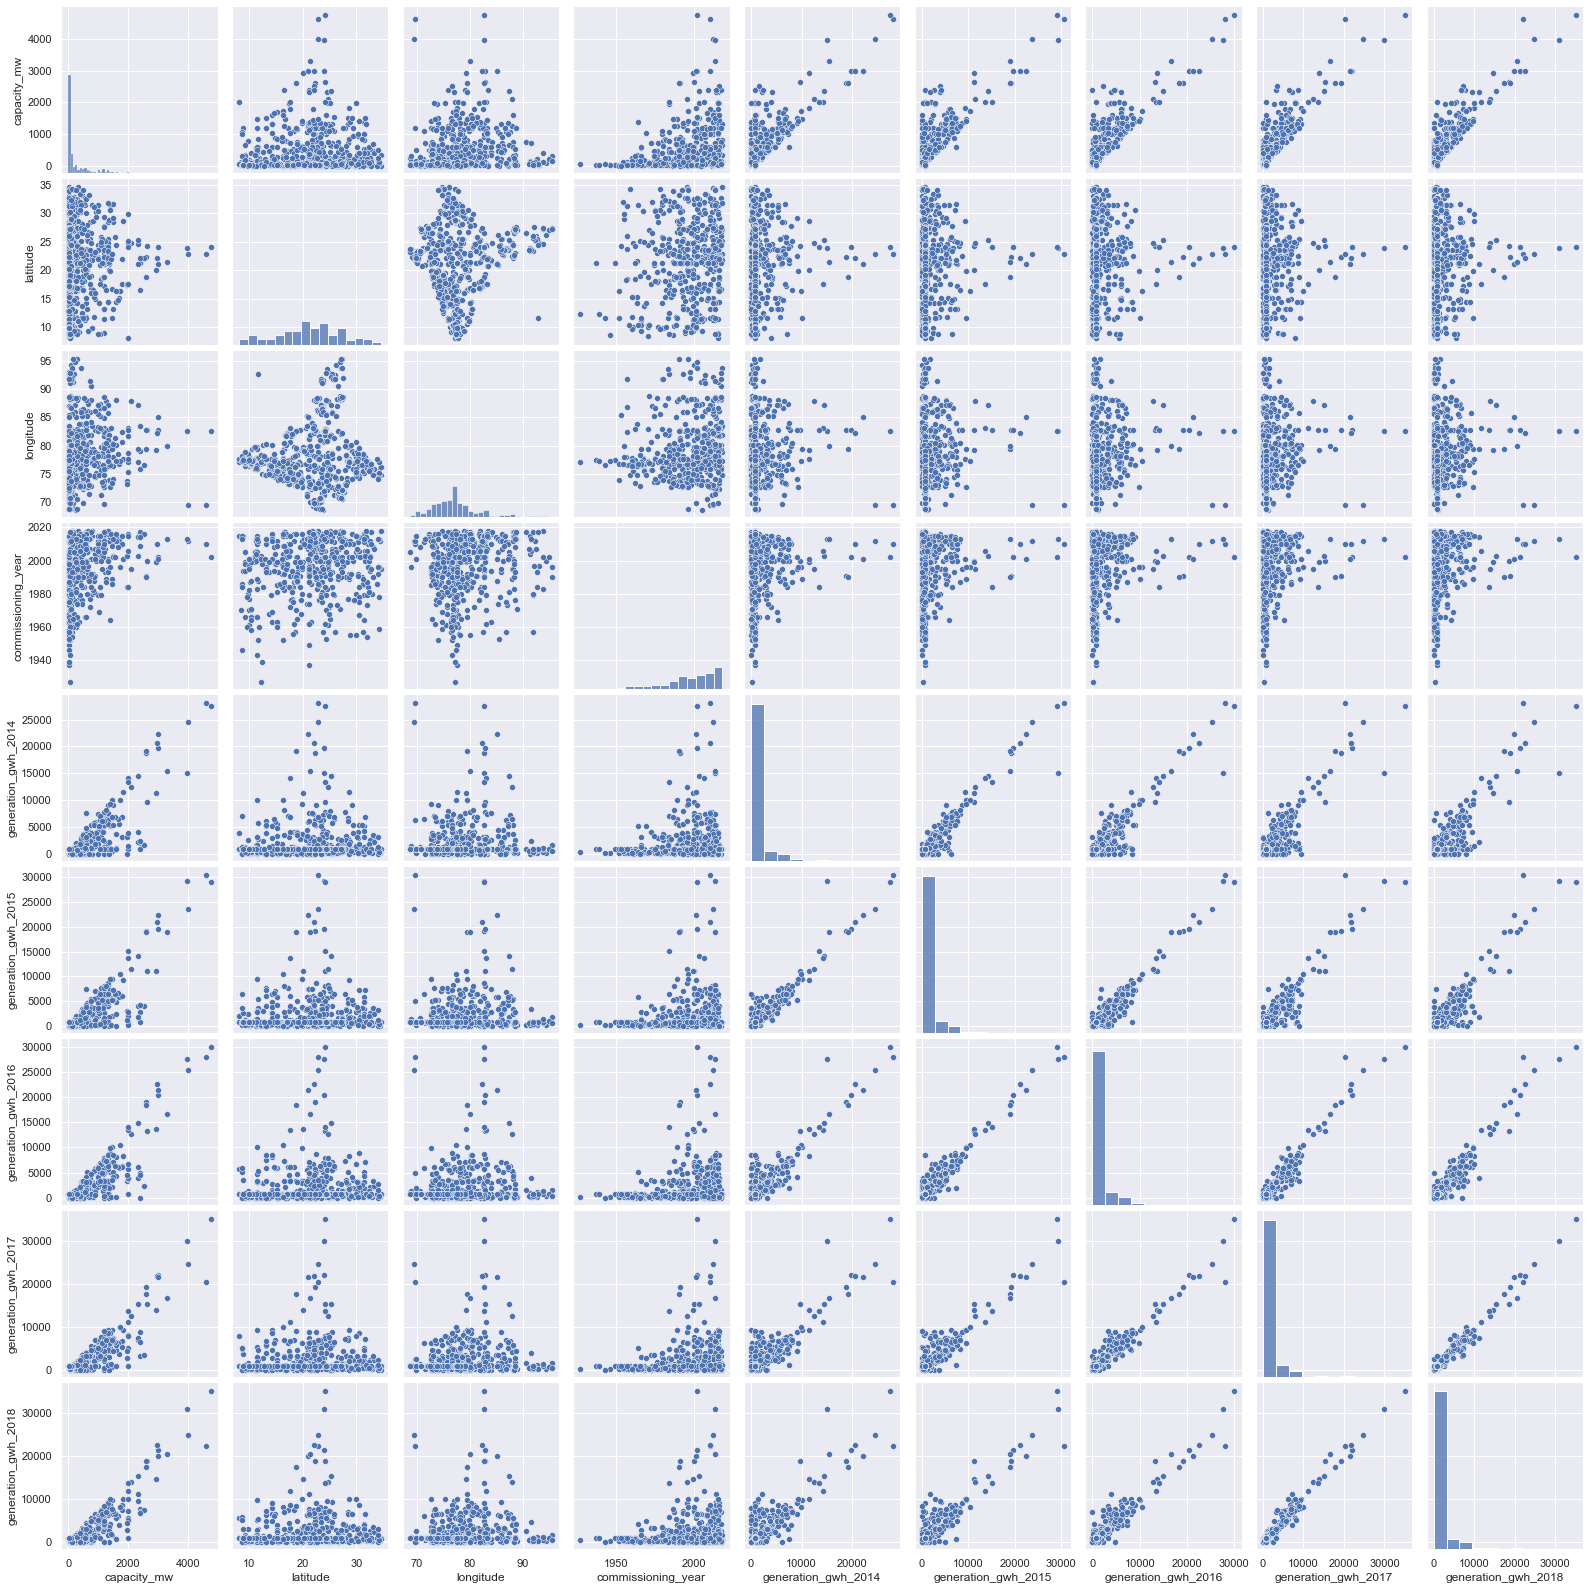

In [41]:
sns.pairplot(df)

Final summary of EDA:-
    
    with 'capacity_mw' we can undetstand that mostly production depends on coal
    
    with 'longitude & latitude ' we can understand that these two are not playing that much important role 
    
    with 'primary_fuel' we can undestand that coal is primary fuel
    
    with 'commissioning_year' we can understand that after 2000 plant capacity is increasing very much
    
    with 'generation_mw_2014-2018' we can understand that plants capacity is growing every year

# Data pre-processing

some of columns like name,gppd_idnr,commissioning_year not playing important role so we can drop them

In [42]:
df.drop(['name','commissioning_year','gppd_idnr','owner'],axis=1,inplace=True)

# Encoding target columns

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])

In [44]:
df.head(3)

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.20545,817.97725,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.20545,817.97725,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.20545,817.97725,751.644375


In [45]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.793497,0.819676,0.853008,0.868338,0.884840
latitude,0.050984,1.000000,0.036362,-0.010204,0.058594,0.053869,0.047677,0.057897,0.055216
longitude,0.195882,0.036362,1.000000,-0.347948,0.104649,0.121513,0.143459,0.151712,0.155063
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,-0.240656,-0.249304,-0.259708,-0.263599,-0.271198
generation_gwh_2014,0.793497,0.058594,0.104649,-0.240656,1.000000,0.963719,0.935067,0.904075,0.895143
generation_gwh_2015,0.819676,0.053869,0.121513,-0.249304,0.963719,1.000000,0.973231,0.940229,0.933161
generation_gwh_2016,0.853008,0.047677,0.143459,-0.259708,0.935067,0.973231,1.000000,0.973909,0.964988
generation_gwh_2017,0.868338,0.057897,0.151712,-0.263599,0.904075,0.940229,0.973909,1.000000,0.986685
generation_gwh_2018,0.884840,0.055216,0.155063,-0.271198,0.895143,0.933161,0.964988,0.986685,1.000000


<AxesSubplot:>

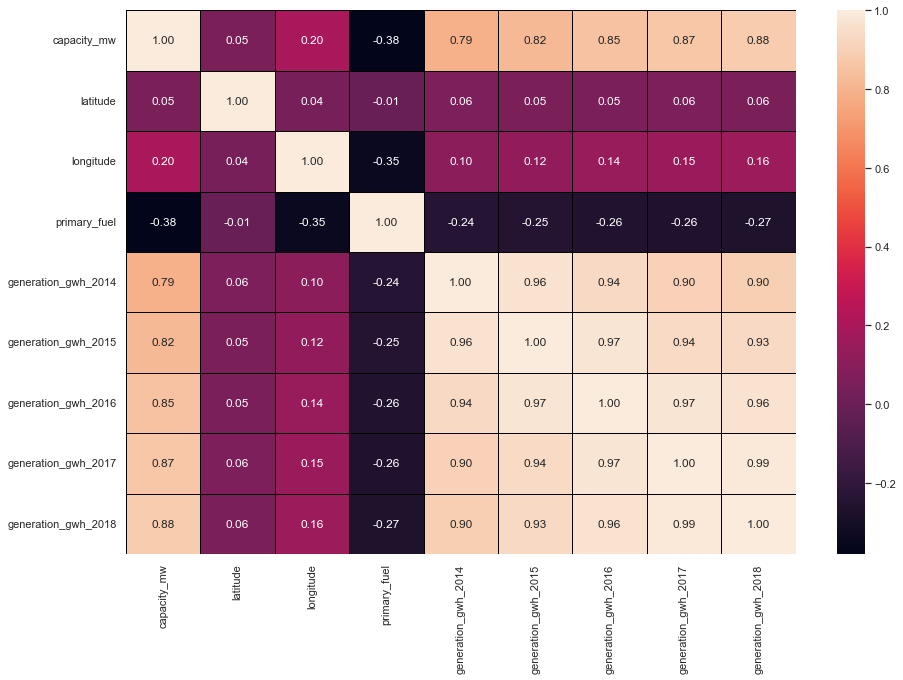

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='black',fmt='.2f')

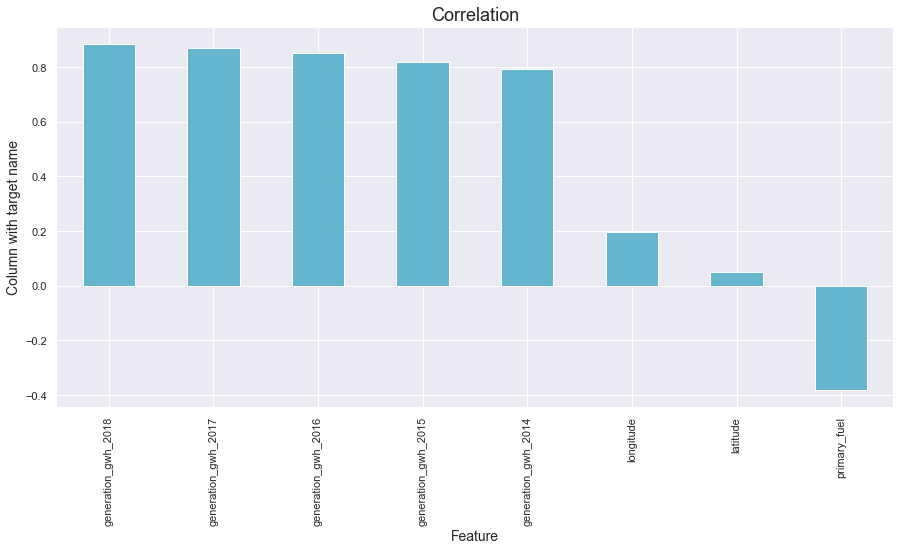

In [47]:
plt.figure(figsize=(15,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target name',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

With the above graph we can understand that primary_fuel is negatively correlated with 'capacity_mw'

from the heatmap we can strongly understood that growth columns are highly correlated

# Checking Outliers

<AxesSubplot:>

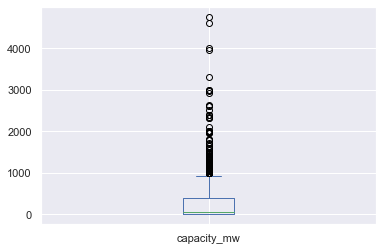

In [48]:
df['capacity_mw'].plot.box()

<AxesSubplot:>

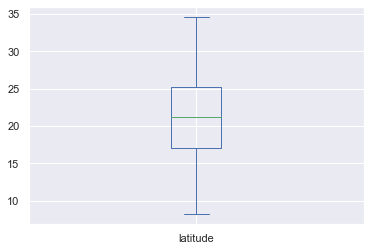

In [49]:
df['latitude'].plot.box()

<AxesSubplot:>

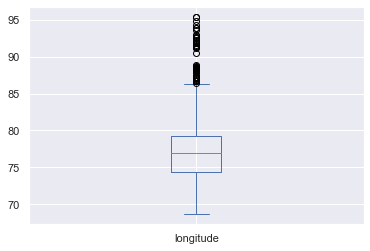

In [50]:
df['longitude'].plot.box()

<AxesSubplot:>

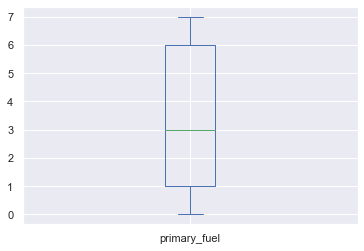

In [51]:
df['primary_fuel'].plot.box()

<AxesSubplot:>

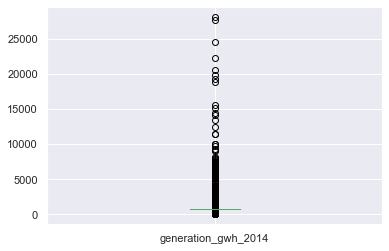

In [52]:
df['generation_gwh_2014'].plot.box()

<AxesSubplot:>

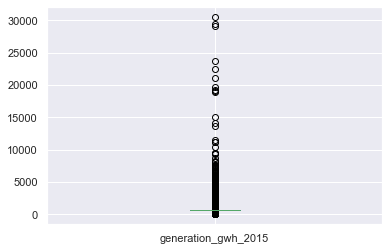

In [53]:
df['generation_gwh_2015'].plot.box()

<AxesSubplot:>

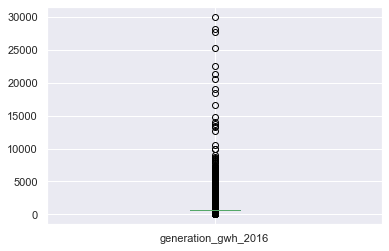

In [54]:
df['generation_gwh_2016'].plot.box()

<AxesSubplot:>

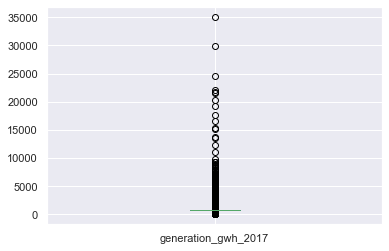

In [55]:
df['generation_gwh_2017'].plot.box()

<AxesSubplot:>

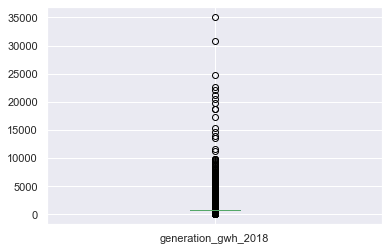

In [56]:
df['generation_gwh_2018'].plot.box()

With the above plot we can understand that generation_gwh have lot of outliers

# Removing Outliers

In [57]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [58]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       179, 183, 209, 209, 209, 209, 209, 209, 244, 308, 308, 308, 308,
       308, 308, 323, 333, 340, 360, 363, 364, 364, 364, 364, 364, 364,
       375, 416, 427, 482, 482, 493, 493, 493, 493, 493, 493, 494, 494,
       494, 494, 494, 494, 499, 519, 532, 546, 577, 623, 638, 648, 648,
       648, 648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695,
       695, 695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724,
       726, 726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786,
       788, 808, 808, 808, 808, 808, 808, 818, 847, 880, 880, 880, 880,
       880, 880], dtype=int64), array([0, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 2, 2, 0, 4, 5, 6, 7, 8, 2,
       0, 4, 5, 6, 7, 8, 2, 2, 2, 2, 0, 0, 4, 5, 6, 7, 8, 0, 2, 2, 0, 8,
       0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 2, 2, 4, 2, 2, 4, 2, 0, 4, 5,
       6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5,
       6, 7, 8, 0, 4, 5, 6,

In [59]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(907, 9)
(866, 9)


In [60]:
loss_percentage=(907-866)/907*100
print(loss_percentage)

4.5203969128996695


# Hence data loss is less than 10 percent we can proceed with new data

In [61]:
df1.shape

(866, 9)

In [62]:
df1.head(3)

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.20545,817.97725,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.20545,817.97725,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.20545,817.97725,751.644375


# Removing skewness

In [63]:
df1.skew()

capacity_mw            2.029125
latitude              -0.110925
longitude              0.935570
primary_fuel           0.417203
generation_gwh_2014    2.997212
generation_gwh_2015    2.798104
generation_gwh_2016    2.736037
generation_gwh_2017    2.633766
generation_gwh_2018    2.701508
dtype: float64

In [64]:
from sklearn.preprocessing import power_transform

# Spliting the data

X=df1.drop(['capacity_mw'],axis=1)
y=df1.iloc[:,0]

X=power_transform(X,method='yeo-johnson')

In [65]:
X=pd.DataFrame(data=X)

# Standardizing the data

In [66]:
from sklearn.preprocessing import StandardScaler

SDC=StandardScaler()
X=SDC.fit_transform(X)

Data is scaled now check the multicollinearity

# VIF -  Variance inflation factor

In [67]:
import statsmodels.api as sm

from scipy import stats

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [69]:
dfx=pd.DataFrame(data=X,columns=['latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'])

In [70]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i)for i in range (x.shape[1])]
    return(vif)

In [71]:
calc_vif(dfx)

,variables,VIF FACTOR
0,latitude,1.023721
1,longitude,1.174497
2,primary_fuel,1.194083
3,generation_gwh_2014,3.576558
4,generation_gwh_2015,6.279617
5,generation_gwh_2016,10.757296
6,generation_gwh_2017,9.758001
7,generation_gwh_2018,9.231482


In [72]:
dfx.drop('generation_gwh_2016',axis=1,inplace=True)

In [73]:
calc_vif(dfx)

,variables,VIF FACTOR
0,latitude,1.020927
1,longitude,1.168939
2,primary_fuel,1.193304
3,generation_gwh_2014,3.573753
4,generation_gwh_2015,4.377615
5,generation_gwh_2017,8.513010
6,generation_gwh_2018,8.635154


In [74]:
x=dfx

# VIF is less thand 10 for all values we can proceed for model building

# Model Development

In [75]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 

# Linear Regression

In [76]:
lr=LinearRegression()
for i in range(0,1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=i,test_size=.25)
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    if round(r2_score(y_train,pred_train)*100,1):
        print("At Random state ",i,"The model perform very well")
        print("At Random State ",i)
        print("Training R2 score ",r2_score(y_train,pred_train)*100)
        print("Training R2 score ",r2_score(y_test,pred_test)*100)

At Random state  0 The model perform very well
At Random State  0
Training R2 score  44.547629122914714
Training R2 score  47.64546419313158
At Random state  1 The model perform very well
At Random State  1
Training R2 score  46.88973021022822
Training R2 score  42.73381433820145
At Random state  2 The model perform very well
At Random State  2
Training R2 score  46.47097752429082
Training R2 score  43.631529017302626
At Random state  3 The model perform very well
At Random State  3
Training R2 score  46.74040221081759
Training R2 score  41.00200389998084
At Random state  4 The model perform very well
At Random State  4
Training R2 score  47.0135566997682
Training R2 score  42.15996985212347
At Random state  5 The model perform very well
At Random State  5
Training R2 score  47.13804105101066
Training R2 score  41.4594453840804
At Random state  6 The model perform very well
At Random State  6
Training R2 score  42.83561917361875
Training R2 score  52.045273983946274
At Random state  7 

At random_state 997 Training_r2 score - 45.548
                    Testing_r2 socre - 46.964

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=997)

In [78]:
lr.fit(X_train,y_train)
pred_test=lr.predict(X_test)

print('Linear model accuracy is: ',r2_score(y_test,pred_test))

Linear model accuracy is:  0.4696481850967208


# Let's check the model for cross validation

Cross validation of model

In [79]:
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for  i in range(2,10):
    cv_score=cross_val_score(lr,X,y,cv=i,scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold{i} the cross Val score is {cv_mean*100}and Accuracy score is {test_accuracy*100}")

At cross fold2 the cross Val score is 41.58157117646753and Accuracy score is 46.96481850967208
At cross fold3 the cross Val score is 39.04574844315465and Accuracy score is 46.96481850967208
At cross fold4 the cross Val score is 40.2388205647424and Accuracy score is 46.96481850967208
At cross fold5 the cross Val score is 40.8254011650332and Accuracy score is 46.96481850967208
At cross fold6 the cross Val score is 40.96668487439048and Accuracy score is 46.96481850967208
At cross fold7 the cross Val score is 37.88764614287687and Accuracy score is 46.96481850967208
At cross fold8 the cross Val score is 39.9067462717111and Accuracy score is 46.96481850967208
At cross fold9 the cross Val score is 39.38861907396and Accuracy score is 46.96481850967208


In [80]:


print('Mean Absolute Error:',mean_absolute_error(y_test,pred_test))
print('Mean squared Error: ',mean_squared_error(y_test,pred_test))
print('Root Mean square Error: ',np.sqrt(mean_squared_error(y_test,pred_test)))

Mean Absolute Error: 217.41919328216127
Mean squared Error:  86750.87354614628
Root Mean square Error:  294.53501242831265


Hence the model score is showing low performance let's try another model

# Lasso Regression:

In [81]:
ls=Lasso()
ls.fit(X_train,y_train)
ls.score(X_train,y_train)
ls_pred=ls.predict(X_test)

lsd=r2_score(y_test,ls_pred)
print('R2 score:',lsd*100)

rdscore = cross_val_score(ls,X,y,cv=8,scoring='r2')
lsc = rdscore.mean()
print('Cross val Score:',lsc*100)

R2 score: 47.024846655556516
Cross val Score: 40.416673151250386


In [82]:

print('Mean Absolute Error:',mean_absolute_error(y_test,ls_pred))
print('Mean squared Error: ',mean_squared_error(y_test,ls_pred))
print('Root Mean square Error: ',np.sqrt(mean_squared_error(y_test,ls_pred)))

Mean Absolute Error: 217.40125075295634
Mean squared Error:  86652.68411893031
Root Mean square Error:  294.36827974313115


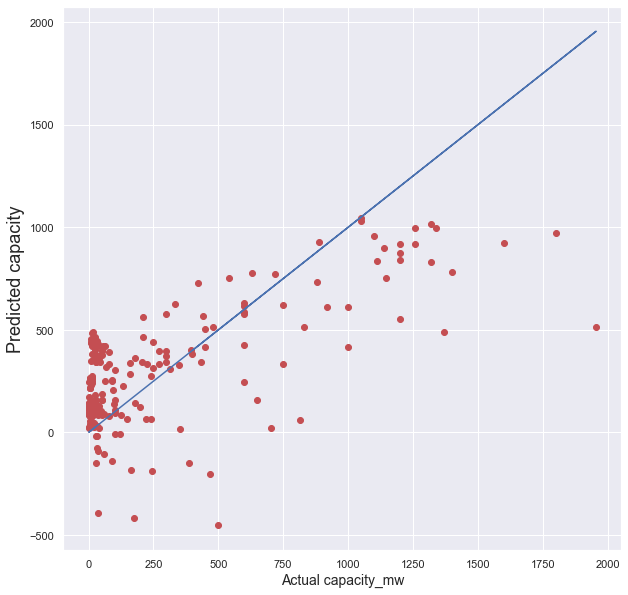

In [83]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test,y=ls_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual capacity_mw',fontsize=14)
plt.ylabel('Predicted capacity',fontsize=18)
plt.show()

R2 score = 47.02

cross validation score = 40.41

Hence both has too much difference so model is not performing very well let's try anothe model

# Ridge Regression:

In [84]:
rd=Ridge()
rd.fit(X_train,y_train)
rd.score(X_train,y_train)
rd_pred = rd.predict(X_test)

rds = r2_score(y_test,rd_pred)
print('R2 Score: ',rds*100)

rdCVscore = cross_val_score(rd,X,y,cv=8,scoring='r2')
rdCV=rdCVscore.mean()
print('Cross val score',rdCV*100)

R2 Score:  46.99037824012979
Cross val score 39.954853306543306


In [85]:
print('Mean Absolute Error:',mean_absolute_error(y_test,rd_pred))
print('Mean squared Error: ',mean_squared_error(y_test,rd_pred))
print('Root Mean square Error: ',np.sqrt(mean_squared_error(y_test,rd_pred)))

Mean Absolute Error: 217.4047808730508
Mean squared Error:  86709.06490360934
Root Mean square Error:  294.4640298977268


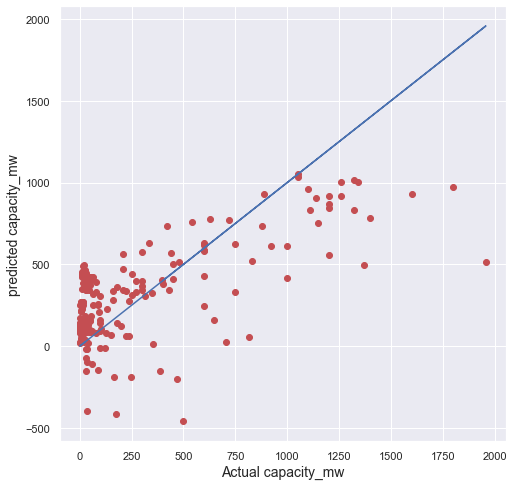

In [86]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=rd_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual capacity_mw',fontsize=14)
plt.ylabel('predicted capacity_mw',fontsize=14)
plt.show()

Here also R2 value and Cross validation score is too differing so model is not performing well let's check with another

# Decision Tree Regressor

In [87]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
dt_pred=dt.predict(X_test)

dt_score=r2_score(y_test,dt_pred)
print('R2 score:',dt_score*100)

dtCVscore=cross_val_score(dt,X,y,cv=8,scoring='r2')
dtCV=dtCVscore.mean()
print('Cross val score:',dtCV*100)

R2 score: 66.96116781245671
Cross val score: 63.55901134935221


In [88]:
print('Mean Absolute Error:',mean_absolute_error(y_test,dt_pred))
print('Mean squared Error: ',mean_squared_error(y_test,dt_pred))
print('Root Mean square Error: ',np.sqrt(mean_squared_error(y_test,dt_pred)))

Mean Absolute Error: 110.27652676355903
Mean squared Error:  54042.38229554505
Root Mean square Error:  232.47017506670625


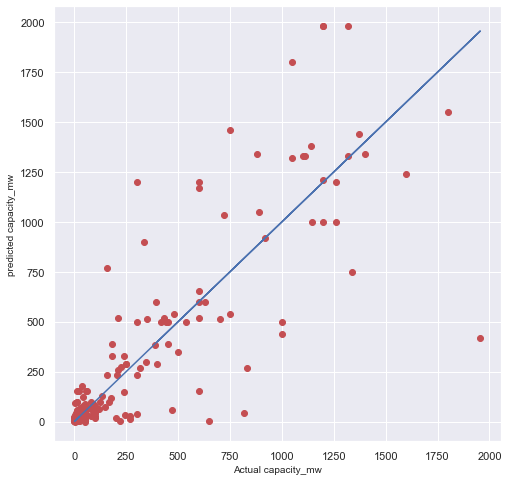

In [89]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=dt_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual capacity_mw',fontsize=10)
plt.ylabel('predicted capacity_mw',fontsize=10)
plt.show()

Hence R2 score and Cross validation score is giving same output but model performance is very poor

# KNeighbors Regressor

In [90]:
kn=KNeighborsRegressor()
kn.fit(X_train,y_train)
kn.score(X_train,y_train)
kn_pred=kn.predict(X_test)

kn_score=r2_score(y_test,kn_pred)
print('R2 score:',kn_score*100)

kn_cvscore=cross_val_score(kn,X,y,cv=8,scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val score:',cv_mean*100)

R2 score: 80.12647234431425
Cross val score: 74.9468761993359


In [91]:
print('Mean Absolute Error:',mean_absolute_error(y_test,kn_pred))
print('Mean squared Error: ',mean_squared_error(y_test,kn_pred))
print('Root Mean square Error: ',np.sqrt(mean_squared_error(y_test,kn_pred)))

Mean Absolute Error: 94.31539078341014
Mean squared Error:  32507.589040468392
Root Mean square Error:  180.29861075579143


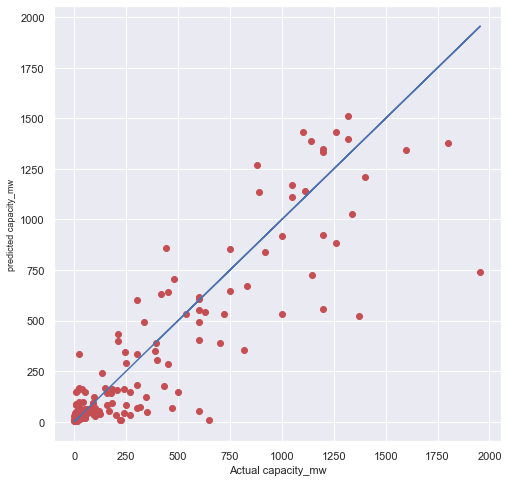

In [92]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=kn_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual capacity_mw',fontsize=11)
plt.ylabel('predicted capacity_mw',fontsize=9)
plt.show()

Here R2 score is 80 and cross validation score is 74 still the difference score is high let's try another model

# Ensemble techniques:-

In [93]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
rf_pred=rf.predict(X_test)

rf_score=r2_score(y_test,rf_pred)
print('R2 score:',rf_score*100)

rfCV=cross_val_score(rf,X,y,cv=8,scoring='r2')
rfCVscore=rfCV.mean()
print('Cross val score:',rfCVscore*100)

R2 score: 79.99511768905776
Cross val score: 77.61984007342866


In [94]:
print('Mean Absolute Error:',mean_absolute_error(y_test,rf_pred))
print('Mean squared Error: ',mean_squared_error(y_test,rf_pred))
print('Root Mean square Error: ',np.sqrt(mean_squared_error(y_test,rf_pred)))

Mean Absolute Error: 91.67990034882519
Mean squared Error:  32722.44888949014
Root Mean square Error:  180.89347387202818


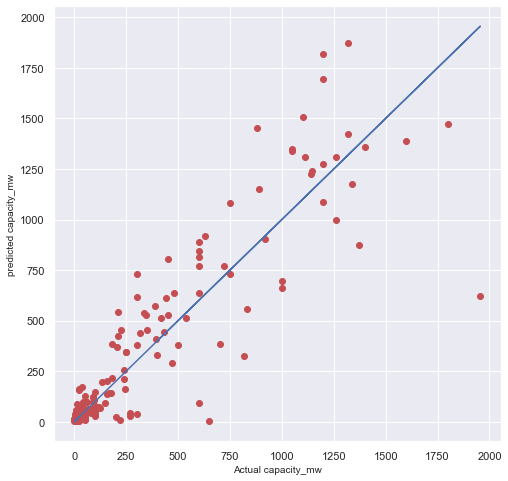

In [95]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=rf_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual capacity_mw',fontsize=10)
plt.ylabel('predicted capacity_mw',fontsize=10)
plt.show()

Here R2 score is 79.81 and cross validation score is 77.74 still the difference score is high let's try another model

# Gradient Boosting Regressor

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
gb.score(X_train,y_train)
gb_pred=rf.predict(X_test)

gb_score=r2_score(y_test,rf_pred)
print('R2 score:',gb_score*100)

gbCV=cross_val_score(gb,x,y,cv=8,scoring='r2')
gbCVscore=gbCV.mean()
print('Cross val Score:',gbCVscore*100)

R2 score: 79.99511768905776
Cross val Score: 72.52295235338347


In [97]:
print('Mean Absolute Error:',mean_absolute_error(y_test,gb_pred))
print('Mean squared Error: ',mean_squared_error(y_test,gb_pred))
print('Root Mean square Error: ',np.sqrt(mean_squared_error(y_test,gb_pred)))

Mean Absolute Error: 91.67990034882519
Mean squared Error:  32722.44888949014
Root Mean square Error:  180.89347387202818


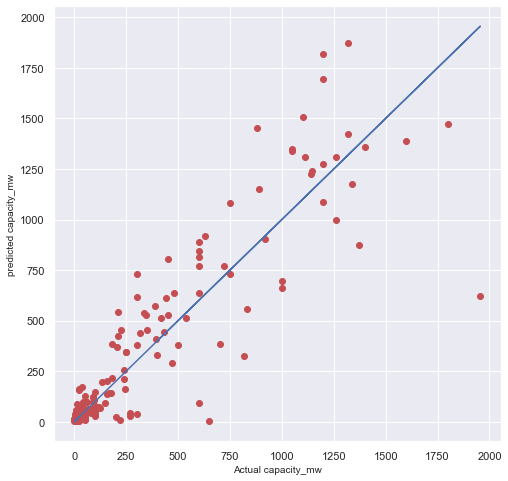

In [98]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=gb_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual capacity_mw',fontsize=10)
plt.ylabel('predicted capacity_mw',fontsize=10)
plt.show()

Here R2 score is 79.81 and cross validation score is 72.52 still the difference score is high let's try another model

Random forest regressor is remains as best model among all so we will do hyper parameter tuning for that

# Hyper parameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['mse','absolute_error','squared_error','poission'],'max_features':['auto','sqrt','log2'],'n_estimators':[100,200,300,400,500],'min_samples_split':[1,2,3,4,10]}
rf=RandomForestRegressor()
rfclf=GridSearchCV(rf,param_grid=parameters,n_jobs=-1)
rfclf.fit(X_train,y_train)
print(rfclf.best_params_)

{'criterion': 'absolute_error', 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}


In [100]:
rf=RandomForestRegressor(criterion='squared_error',max_features='sqrt',min_samples_split=3,n_estimators=100)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
rf_pred=rf.predict(X_test)

rf_score=r2_score(y_test,rf_pred)
print('R2 score:',rf_score*100)

rfCV=cross_val_score(rf,X,y,cv=8,scoring='r2')
rfCVscore=rfCV.mean()
print('Cross val score:',rfCVscore*100)

R2 score: 82.57840666534618
Cross val score: 79.57101725288545


# With the the above we can see that For RandomForestRegressor R2 score and Cross val score is less difference so we can consider it as best model

Saving the best model

In [101]:
import pickle
filename='global_power_plant_evaluation_project.pkl'
pickle.dump(rf,open(filename,'wb'))

In [102]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(X_test))
df_1=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_1

,original,predicted
0,400.0,362.013745
1,480.0,666.237619
2,20.0,23.518500
3,62.6,57.835683
4,66.0,62.600867
...,...,...
212,94.2,128.176142
213,5.0,13.353300
214,25.5,23.801186
215,24.0,27.381367


# Let's predict the primary fuel

In [103]:
df

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,801.123775,711.181225,737.205450,817.977250,751.644375


In [104]:
df.head(3)

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.20545,817.97725,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.20545,817.97725,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.20545,817.97725,751.644375


In [105]:
#Dividing dataset into features and target:
    
X = df.drop('primary_fuel',axis=1)   
y=df['primary_fuel']

In [106]:
X.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

In [107]:
from sklearn.preprocessing import power_transform
X=power_transform(X, method='yeo-johnson')

In [108]:
X2=pd.DataFrame(data=X)

# Scaling the data using Standard scaler

In [109]:
SDc=StandardScaler()
X2=SDc.fit_transform(X2)

In [110]:
X2

array([[-1.69576688,  1.1594364 , -0.95254455, ..., -0.05021518,
        -0.03935862, -0.06117437],
       [ 0.19369368,  0.57903232, -0.54497607, ..., -0.05021518,
        -0.03935862, -0.06117437],
       [-0.2923371 ,  0.09991208, -2.37986379, ..., -0.05021518,
        -0.03935862, -0.06117437],
       ...,
       [-0.52277344, -0.98053644, -0.28081923, ..., -0.05021518,
        -0.03935862, -0.06117437],
       [ 0.08691496,  0.50893808, -0.7963743 , ..., -0.05021518,
        -0.03935862, -0.06117437],
       [-0.75589054, -1.81390048,  0.18088946, ..., -0.05021518,
        -0.03935862, -0.06117437]])

our data is now scaled,let's check multi collinearity

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [112]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [113]:
dfY=pd.DataFrame(data=X2, columns=['capacity_mw', 'latitude', 'longitude', 
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'])

In [114]:
dfY

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.695767,1.159436,-0.952545,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
1,0.193694,0.579032,-0.544976,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
2,-0.292337,0.099912,-2.379864,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
3,0.360998,0.428491,2.174468,-0.243102,0.072704,0.083178,-0.185637,-0.184018
4,1.649503,0.109302,1.117231,1.152947,1.836146,1.842814,1.621580,1.919439
...,...,...,...,...,...,...,...,...
902,1.593509,-0.817376,0.153591,-0.046742,-2.579263,-0.782355,0.001238,-0.122761
903,-1.615576,-1.357110,0.332870,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
904,-0.522773,-0.980536,-0.280819,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
905,0.086915,0.508938,-0.796374,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174


In [115]:
def calc_vif(X):
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif['VIF FACTOR']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
    return(vif)

In [116]:
calc_vif(dfY)

,variables,VIF FACTOR
0,capacity_mw,1.316650
1,latitude,1.019520
2,longitude,1.135901
3,generation_gwh_2014,4.045830
4,generation_gwh_2015,6.833699
5,generation_gwh_2016,11.059023
6,generation_gwh_2017,9.920156
7,generation_gwh_2018,9.646954


In [117]:
dfY.drop('generation_gwh_2016',axis=1,inplace=True)

In [118]:
calc_vif(dfY)

,variables,VIF FACTOR
0,capacity_mw,1.316646
1,latitude,1.015550
2,longitude,1.128891
3,generation_gwh_2014,4.030342
4,generation_gwh_2015,4.831837
5,generation_gwh_2017,8.813378
6,generation_gwh_2018,9.063846


In [119]:
X=dfY

# Model Development

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Choosing best Random State

In [121]:
lr=LogisticRegression()
for i in range(0,1000):
    X_train,x_test,Y_train,y_test=train_test_split(X,y,random_state=i,test_size=0.20)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(Y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state",i,"The model performing well")
        print("At Random state",i)
        print("Training Accuracy score is-",accuracy_score(Y_train,pred_train)*100)
        print("Testin Accuracy score is-",accuracy_score(y_test,pred_test)*100)

At Random state 271 The model performing well
At Random state 271
Training Accuracy score is- 52.689655172413794
Testin Accuracy score is- 52.74725274725275
At Random state 332 The model performing well
At Random state 332
Training Accuracy score is- 52.689655172413794
Testin Accuracy score is- 52.74725274725275
At Random state 583 The model performing well
At Random state 583
Training Accuracy score is- 52.689655172413794
Testin Accuracy score is- 52.74725274725275
At Random state 589 The model performing well
At Random state 589
Training Accuracy score is- 52.689655172413794
Testin Accuracy score is- 52.74725274725275
At Random state 869 The model performing well
At Random state 869
Training Accuracy score is- 52.689655172413794
Testin Accuracy score is- 52.74725274725275
At Random state 872 The model performing well
At Random state 872
Training Accuracy score is- 52.689655172413794
Testin Accuracy score is- 52.74725274725275
At Random state 922 The model performing well
At Random st

At Random state - 271 model is performing well with 50.68 training accuracy,50.74 testing accuracy

In [122]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,random_state=271,test_size=0.30)

In [123]:
lr.fit(X_train,Y_train)
lr_pred=lr.predict(x_test)
print(accuracy_score(y_test,lr_pred))

0.5421245421245421


In [124]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

[[ 0  0  0  3  0  0  0 15]
 [ 0 54  2 26  0  0  0  4]
 [ 0  8  6  5  0  0  0  2]
 [ 0  9  0 38  0  0  6 10]
 [ 0  0  0  1  0  0  0  0]
 [ 0  2  1  2  0  0  0  1]
 [ 0  1  0  9  0  0 27  5]
 [ 0  0  0  7  0  0  6 23]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.73      0.63      0.68        86
           2       0.67      0.29      0.40        21
           3       0.42      0.60      0.49        63
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         6
           6       0.69      0.64      0.67        42
           7       0.38      0.64      0.48        36

    accuracy                           0.54       273
   macro avg       0.36      0.35      0.34       273
weighted avg       0.53      0.54      0.52       273



# Cross Validation of model

In [125]:
lr_pred=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test,lr_pred)
for j in range(2,10):
    lr_cv=cross_val_score(lr,X,y,cv=j,scoring='accuracy')
    lr_cvscore=lr_cv.mean()
    print("at cv:-",j)
    print("Cross validation score is:-",lr_score*100)
    print("Accuracy Score:-",lr_score*100)
    print("\n")

at cv:- 2
Cross validation score is:- 54.21245421245421
Accuracy Score:- 54.21245421245421


at cv:- 3
Cross validation score is:- 54.21245421245421
Accuracy Score:- 54.21245421245421


at cv:- 4
Cross validation score is:- 54.21245421245421
Accuracy Score:- 54.21245421245421


at cv:- 5
Cross validation score is:- 54.21245421245421
Accuracy Score:- 54.21245421245421


at cv:- 6
Cross validation score is:- 54.21245421245421
Accuracy Score:- 54.21245421245421


at cv:- 7
Cross validation score is:- 54.21245421245421
Accuracy Score:- 54.21245421245421


at cv:- 8
Cross validation score is:- 54.21245421245421
Accuracy Score:- 54.21245421245421


at cv:- 9
Cross validation score is:- 54.21245421245421
Accuracy Score:- 54.21245421245421




At Cv-9 cross validation score is 54.212, Accuracy score=54.212 but still model improvement is required let't try another model

# Support Vector Classifier

In [126]:
svc=SVC()
svc.fit(X_train,Y_train)
svc.score(X_train,Y_train)
svc_pred=svc.predict(x_test)

svc_d=accuracy_score(y_test,svc_pred)
print('Accuracy_score:',svc_d*100)

svc_CV=cross_val_score(svc,X,y,cv=8,scoring='accuracy')
svc_score=svc_CV.mean()
print('Cross val Score:',svc_score*100)

Accuracy_score: 61.53846153846154
Cross val Score: 61.51121720229777


In [127]:
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

[[ 0  0  0  1  0  0  0 17]
 [ 0 70  3  8  0  0  1  4]
 [ 0  7  3  7  0  0  0  4]
 [ 0 10  0 41  0  0  1 11]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  5  0  0  0  0  1]
 [ 0  3  0  4  0  0 27  8]
 [ 0  5  0  1  0  0  3 27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.74      0.81      0.77        86
           2       0.27      0.14      0.19        21
           3       0.65      0.65      0.65        63
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         6
           6       0.84      0.64      0.73        42
           7       0.38      0.75      0.50        36

    accuracy                           0.62       273
   macro avg       0.36      0.38      0.36       273
weighted avg       0.58      0.62      0.59       273



R2 score and cross validation both are 61.53,61.51 but the model performance is so poor let's try another model

# Ensemble Techniques

KNeighbors Classifier

In [128]:
kn=KNeighborsClassifier()
kn.fit(X_train, Y_train)
kn.score(X_train,Y_train)
kn_pred=kn.predict(x_test)

kn_score= accuracy_score(y_test, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,X,y, cv=8, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 66.30036630036629
Cross val Score : 66.81318894581587


In [129]:
print(confusion_matrix(y_test,kn_pred))
print(classification_report(y_test,kn_pred))

[[15  1  0  1  0  0  0  1]
 [ 1 63  3 15  0  1  2  1]
 [ 0  8  7  4  0  1  0  1]
 [ 1  9  1 44  0  0  0  8]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  2  3  0  1  0  0]
 [ 1  3  0  6  0  0 29  3]
 [ 4  3  0  0  0  0  7 22]]
              precision    recall  f1-score   support

           0       0.68      0.83      0.75        18
           1       0.72      0.73      0.73        86
           2       0.54      0.33      0.41        21
           3       0.59      0.70      0.64        63
           4       0.00      0.00      0.00         1
           5       0.33      0.17      0.22         6
           6       0.76      0.69      0.72        42
           7       0.61      0.61      0.61        36

    accuracy                           0.66       273
   macro avg       0.53      0.51      0.51       273
weighted avg       0.66      0.66      0.66       273



Accuracy score is 66.30 and cross validation score is 66.81 but the model performance is poor let's try another model

# Decision Tree classifier

In [130]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
dt_pred=dt.predict(x_test)

dt_score=accuracy_score(y_test,dt_pred)
print("accuracy_score",dt_score*100)

dt_CV=cross_val_score(dt,X,y,cv=8,scoring='accuracy')
dtCV_score=dt_CV.mean()
print("Cross val score is:",dtCV_score*100)

accuracy_score 66.30036630036629
Cross val score is: 67.14116596801739


In [131]:
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

[[14  1  0  1  0  0  0  2]
 [ 0 61  6 12  3  1  2  1]
 [ 0  2 12  4  0  1  0  2]
 [ 1  9  5 44  0  0  0  4]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  3  2  0  1  0  0]
 [ 3  3  0  7  0  0 26  3]
 [ 1  3  0  2  0  0  7 23]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.77      0.71      0.74        86
           2       0.46      0.57      0.51        21
           3       0.60      0.70      0.65        63
           4       0.00      0.00      0.00         1
           5       0.33      0.17      0.22         6
           6       0.74      0.62      0.68        42
           7       0.66      0.64      0.65        36

    accuracy                           0.66       273
   macro avg       0.54      0.52      0.52       273
weighted avg       0.67      0.66      0.67       273



Accuracy score is 67.39 and cross validation score is 66.37 model performance is good 

# Random Forest classifier

In [132]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
rf_pred=rf.predict(x_test)

rf_score=accuracy_score(y_test,rf_pred)
print('Accuracy_score:',rf_score*100)

rfCVscore=cross_val_score(rf,X,y,cv=9,scoring='accuracy')
rfCV_score=rfCVscore.mean()
print('Cross validation score:',rfCV_score*100)

Accuracy_score: 73.992673992674
Cross validation score: 75.07810781078108


In [133]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[14  1  0  3  0  0  0  0]
 [ 0 69  3 10  1  1  1  1]
 [ 0  6 10  3  0  1  0  1]
 [ 1  5  1 50  0  0  1  5]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  5  0  0  1  0  0]
 [ 3  2  0  3  0  0 32  2]
 [ 2  3  0  1  0  0  4 26]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        18
           1       0.80      0.80      0.80        86
           2       0.53      0.48      0.50        21
           3       0.70      0.79      0.75        63
           4       0.00      0.00      0.00         1
           5       0.33      0.17      0.22         6
           6       0.84      0.76      0.80        42
           7       0.74      0.72      0.73        36

    accuracy                           0.74       273
   macro avg       0.58      0.56      0.57       273
weighted avg       0.74      0.74      0.74       273



Accuracy score is 73.62 and Cross validation score is 73.53 hence model performance is good

# Ada Boost classifier

In [134]:
ad=AdaBoostClassifier()
ad.fit(X_train,Y_train)
ad.score(X_train,Y_train)
ad_pred=ad.predict(x_test)

ad_score=accuracy_score(y_test,ad_pred)
print('Accuracy score:',ad_score*100)

adCVscore=cross_val_score(ad,X,y,cv=8,scoring='accuracy')
adCV_score=adCVscore.mean()
print('Cross val score:',adCV_score*100)

Accuracy score: 38.82783882783883
Cross val score: 39.15055891942245


In [135]:
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

[[ 0  0  0 18  0  0  0  0]
 [ 0 47  4 32  3  0  0  0]
 [ 0  4  1 13  3  0  0  0]
 [ 0  5  1 57  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  1  0  4  1  0  0  0]
 [ 0  0  0 42  0  0  0  0]
 [ 0  0  0 36  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.82      0.55      0.66        86
           2       0.17      0.05      0.07        21
           3       0.28      0.90      0.43        63
           4       0.12      1.00      0.22         1
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        42
           7       0.00      0.00      0.00        36

    accuracy                           0.39       273
   macro avg       0.17      0.31      0.17       273
weighted avg       0.34      0.39      0.31       273



Accuracy score is 39.82 and cross validation score 39.15 hence model performance is very poor

# GaussianNB

In [136]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,Y_train)
gb.score(X_train,Y_train)
gb_pred=gb.predict(x_test)

gb_score=accuracy_score(y_test,gb_pred)
print("Accuracy score:",gb_score*100)

gb_CV=cross_val_score(gb,X,y,cv=8,scoring='accuracy')
gb_CVscore=gb_CV.mean()
print("Cross val score: ",gb_CVscore*100)

Accuracy score: 58.97435897435898
Cross val score:  56.0132355224344


Hear also model performance is poor still Random forest classifier is best model

# Hyper parameter tuning of the model

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators':[100,200,300,400,500],'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'min_samples_split':[2,5,10,15,100],'max_depth':[5,8,15,25,30]}
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf,param_grid=parameters,n_jobs=-1)
rfclf.fit(X_train,Y_train)
print(rfclf.best_params_)

{'criterion': 'gini', 'max_depth': 30, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}


In [138]:
rf=RandomForestClassifier(criterion='gini', max_depth=15, max_features='log2', min_samples_split=2, n_estimators=100)
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
rf_pred = rf.predict(x_test)

rf_score=accuracy_score(y_test,rf_pred)
print("Accuracy_score: ",rf_score*100)

rfCVscore=cross_val_score(rf,X,y,cv=8,scoring='accuracy')
rfCV_score=rfCVscore.mean()
print('Cross val score:',rfCV_score*100)

Accuracy_score:  74.72527472527473
Cross val score: 72.21704704238472


# Random forest classifier with Accuracy score 73.26 and cross validation score 71.33 it can be selected as our best model

In [139]:
import pickle
filename="Global_power_palnt_pkl"
pickle.dump(rf,open(filename,'wb'))

In [140]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_s=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_s

,original,predicted
0,7,7
1,1,1
2,1,1
3,7,6
4,7,7
...,...,...
268,3,1
269,3,7
270,6,6
271,3,3
